In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
## EDA

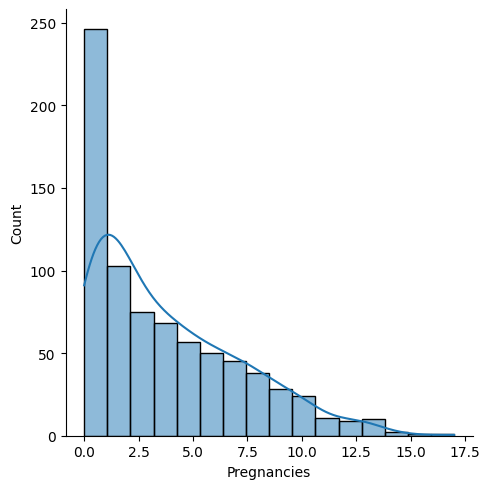

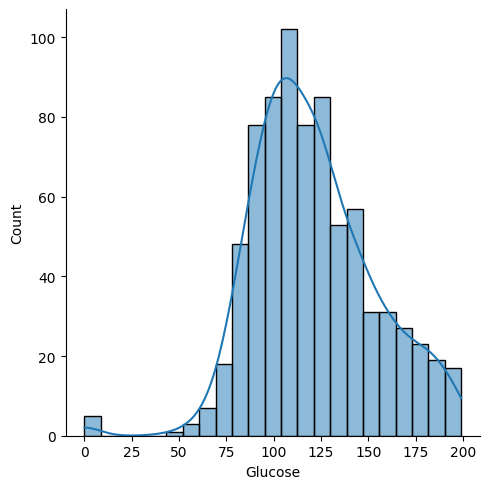

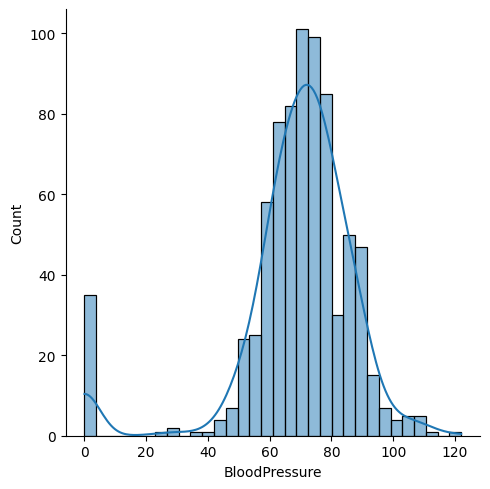

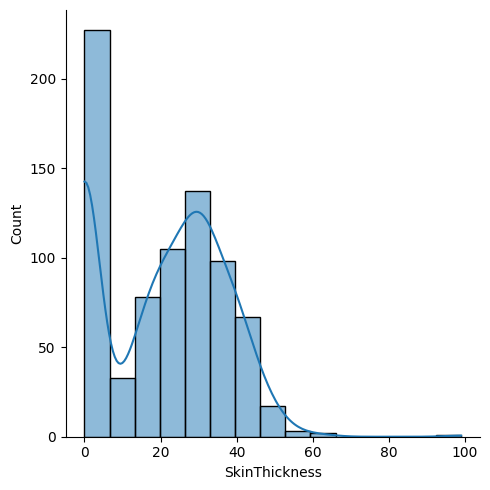

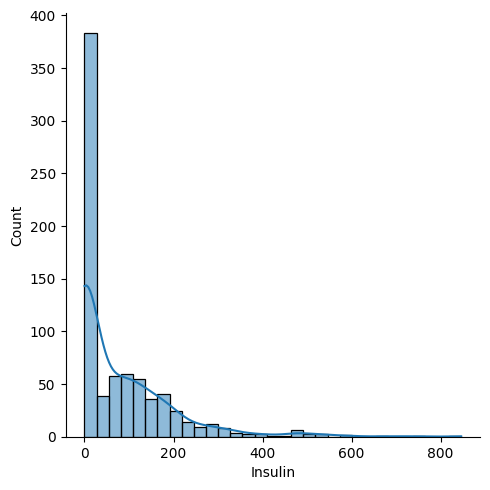

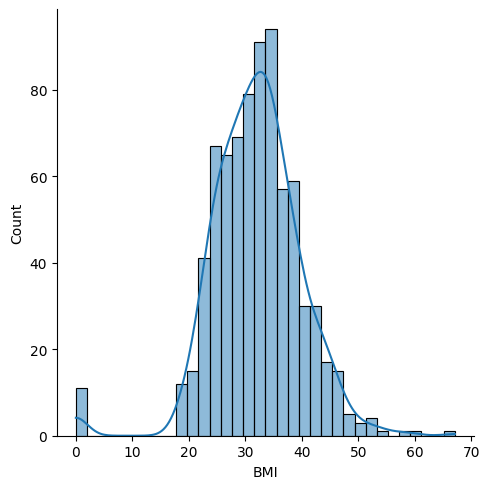

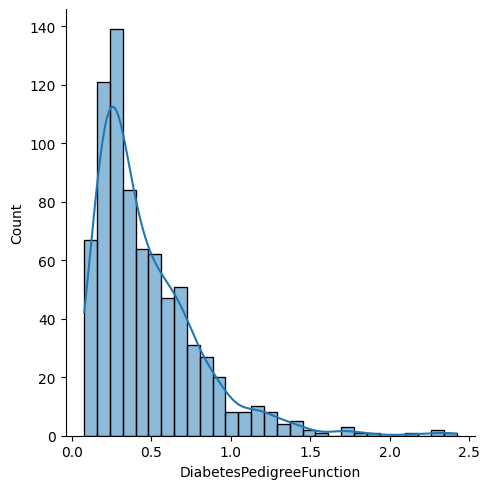

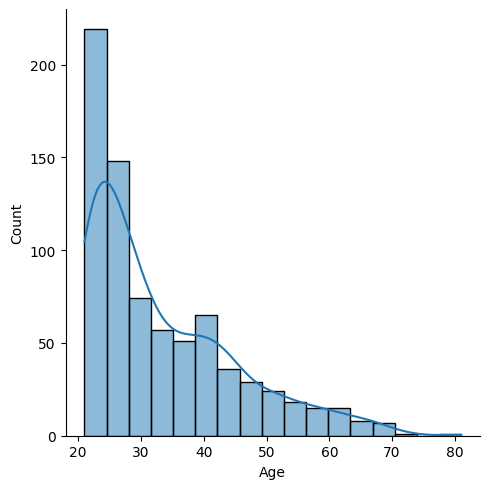

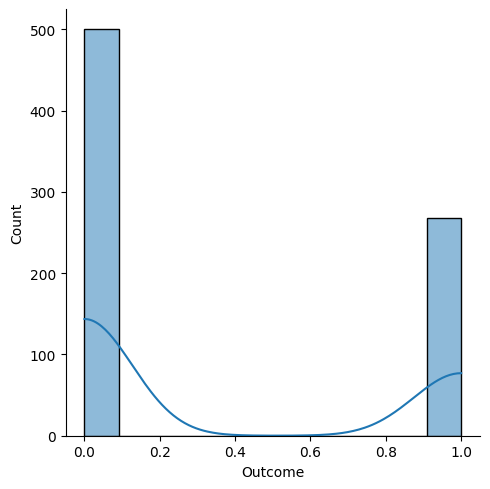

In [8]:
features = data.columns
for x in features:
  p = sns.displot(data=data[x], kde=True)
  plt.xlabel(x)
  plt.show()

In [9]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Since 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI' cannot be zero we are going to treat them as NaN values

In [10]:
data_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
data[data_zeros]=np.where((data[data_zeros] == 0), np.NaN, data[data_zeros])

In [11]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


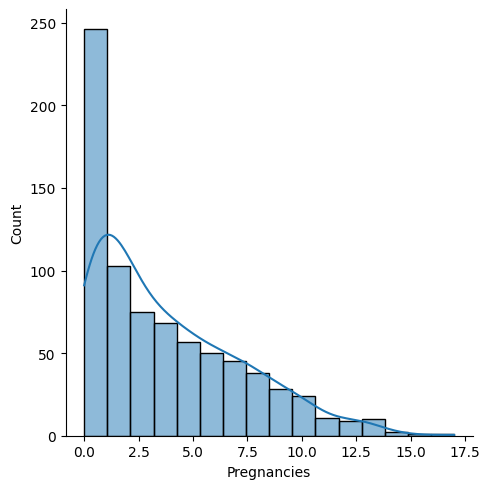

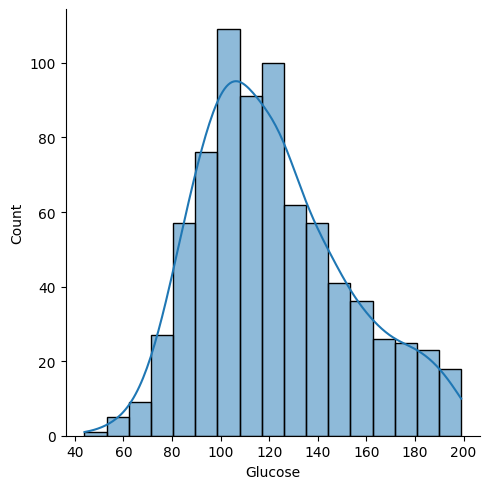

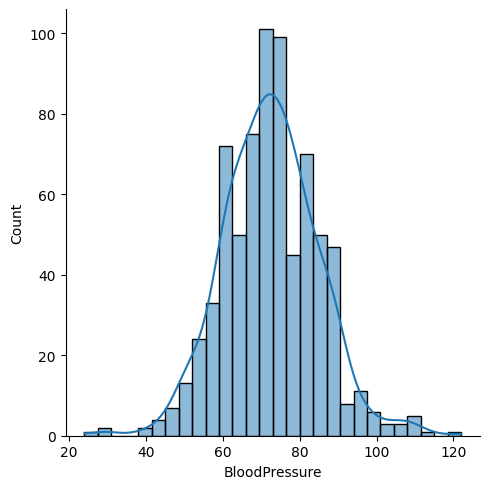

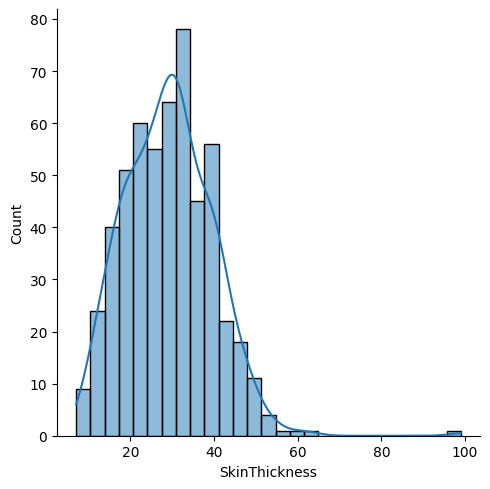

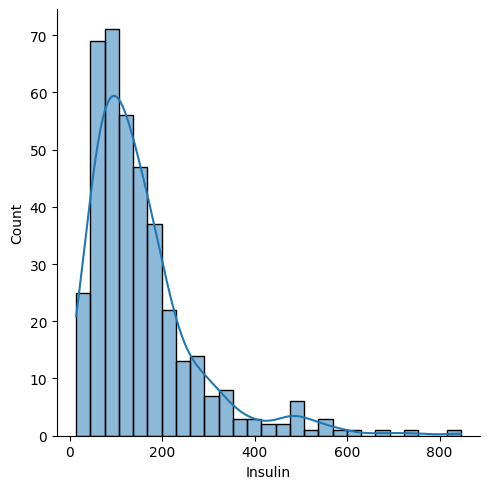

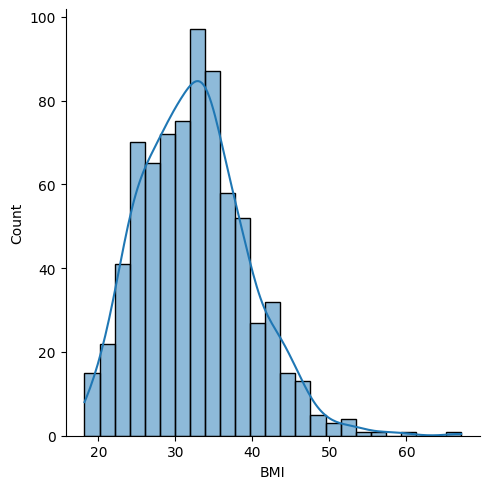

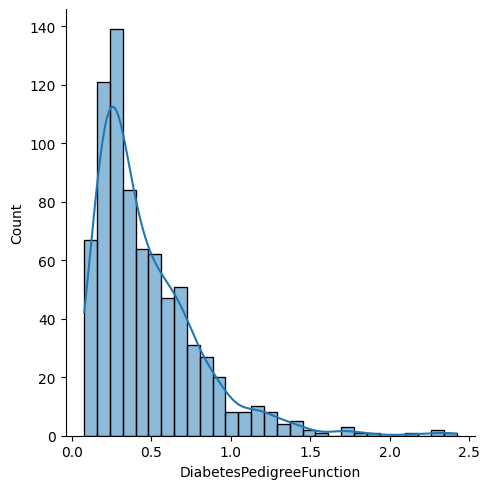

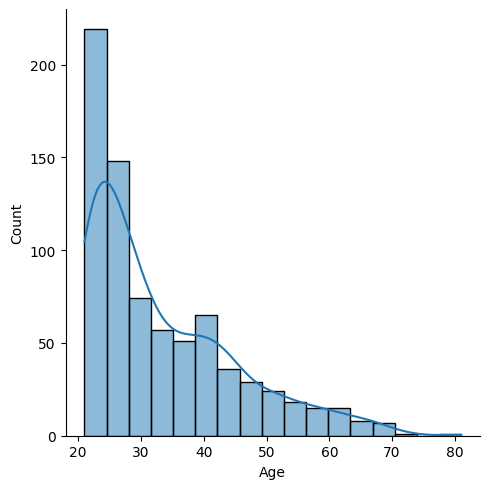

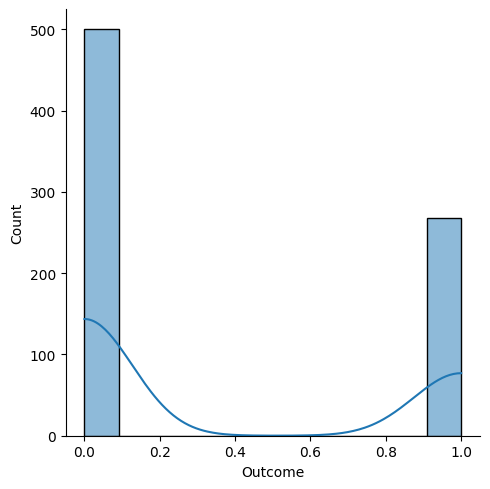

In [12]:
for feature in features:
  sns.displot(data=data[feature],kde=True )
  plt.show()

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

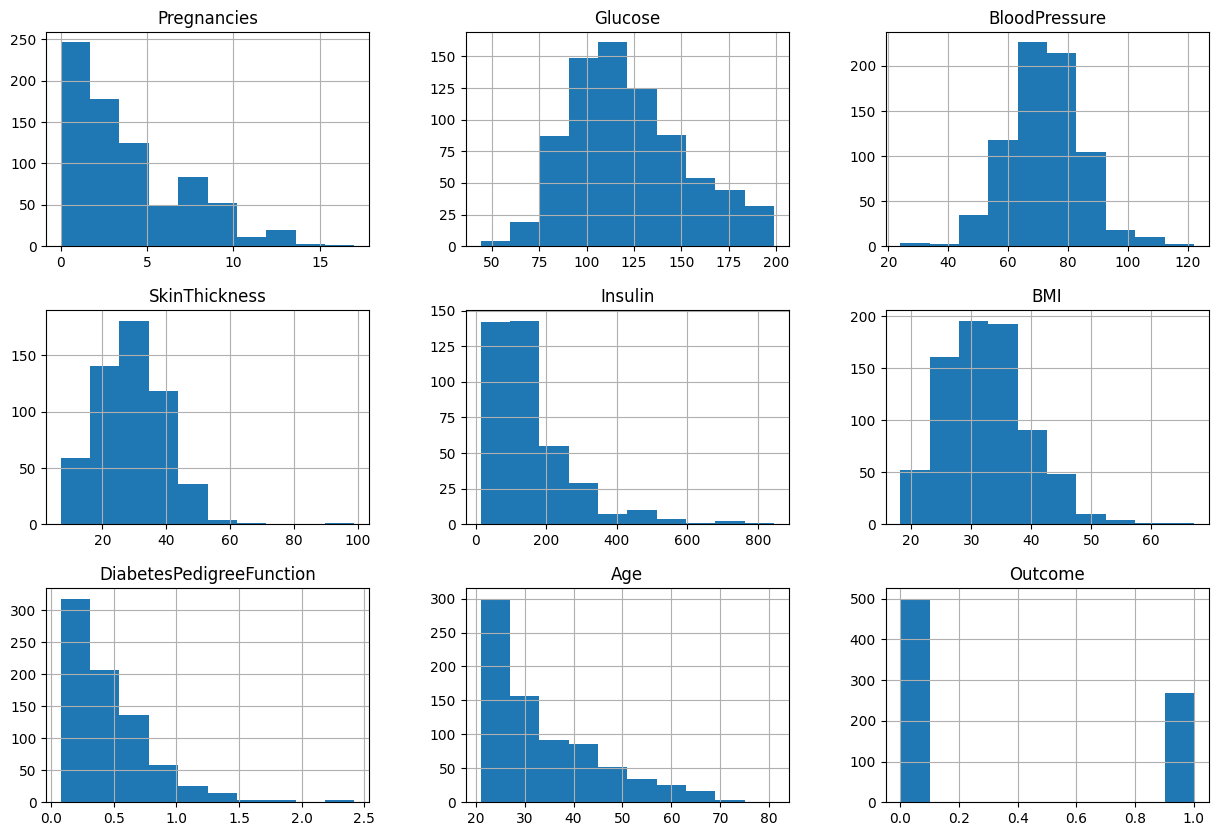

In [13]:
data.hist(figsize=(15,10))

In [14]:
import statistics
x = [2,4,8,6,]
y=  [2,4,8,6,40]
statistics.mean(x), statistics.mean(y)

(5, 12)

Handling Missing Values

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [16]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [19]:
data['Glucose']=data['Glucose'].fillna(data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].fillna(data['BloodPressure'].mean())

In [20]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: ylabel='SkinThickness'>

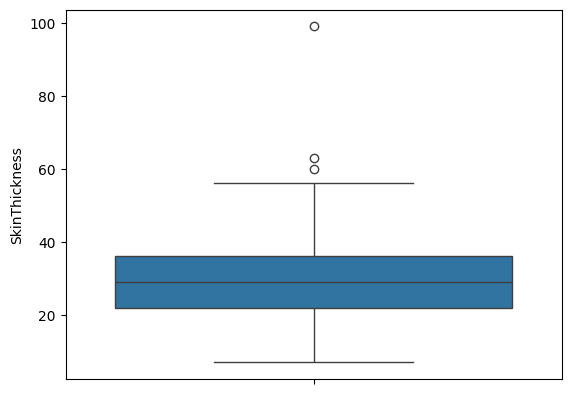

In [24]:
sns.boxplot(data['SkinThickness'])

In [23]:
data['SkinThickness'].median(), data['SkinThickness'].mean()

(29.0, 29.153419593345657)

In [25]:
data['SkinThickness']=data['SkinThickness'].fillna(data['SkinThickness'].median())

(125.0, 155.5482233502538)

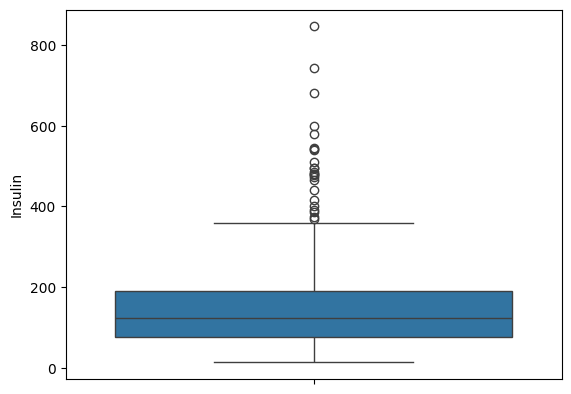

In [27]:
sns.boxplot(data['Insulin'])
data['Insulin'].median(), data['Insulin'].mean()

In [28]:
data['Insulin']=data['Insulin'].fillna(data['Insulin'].median())

In [29]:
data['BMI'].median(), data['BMI'].mean()

(32.3, 32.457463672391015)

In [31]:
data['BMI']=data['BMI'].fillna(data['BMI'].median())

In [32]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

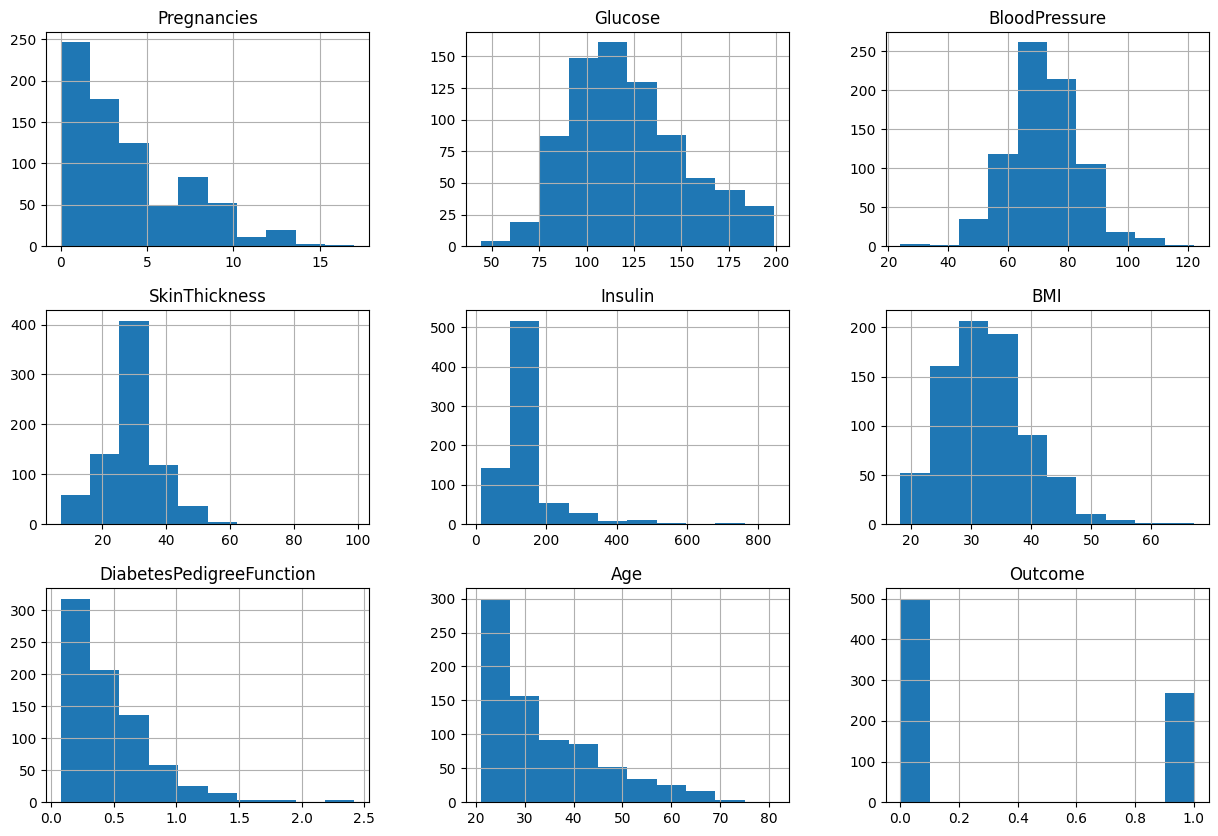

In [34]:
data.hist(figsize=(15,10))

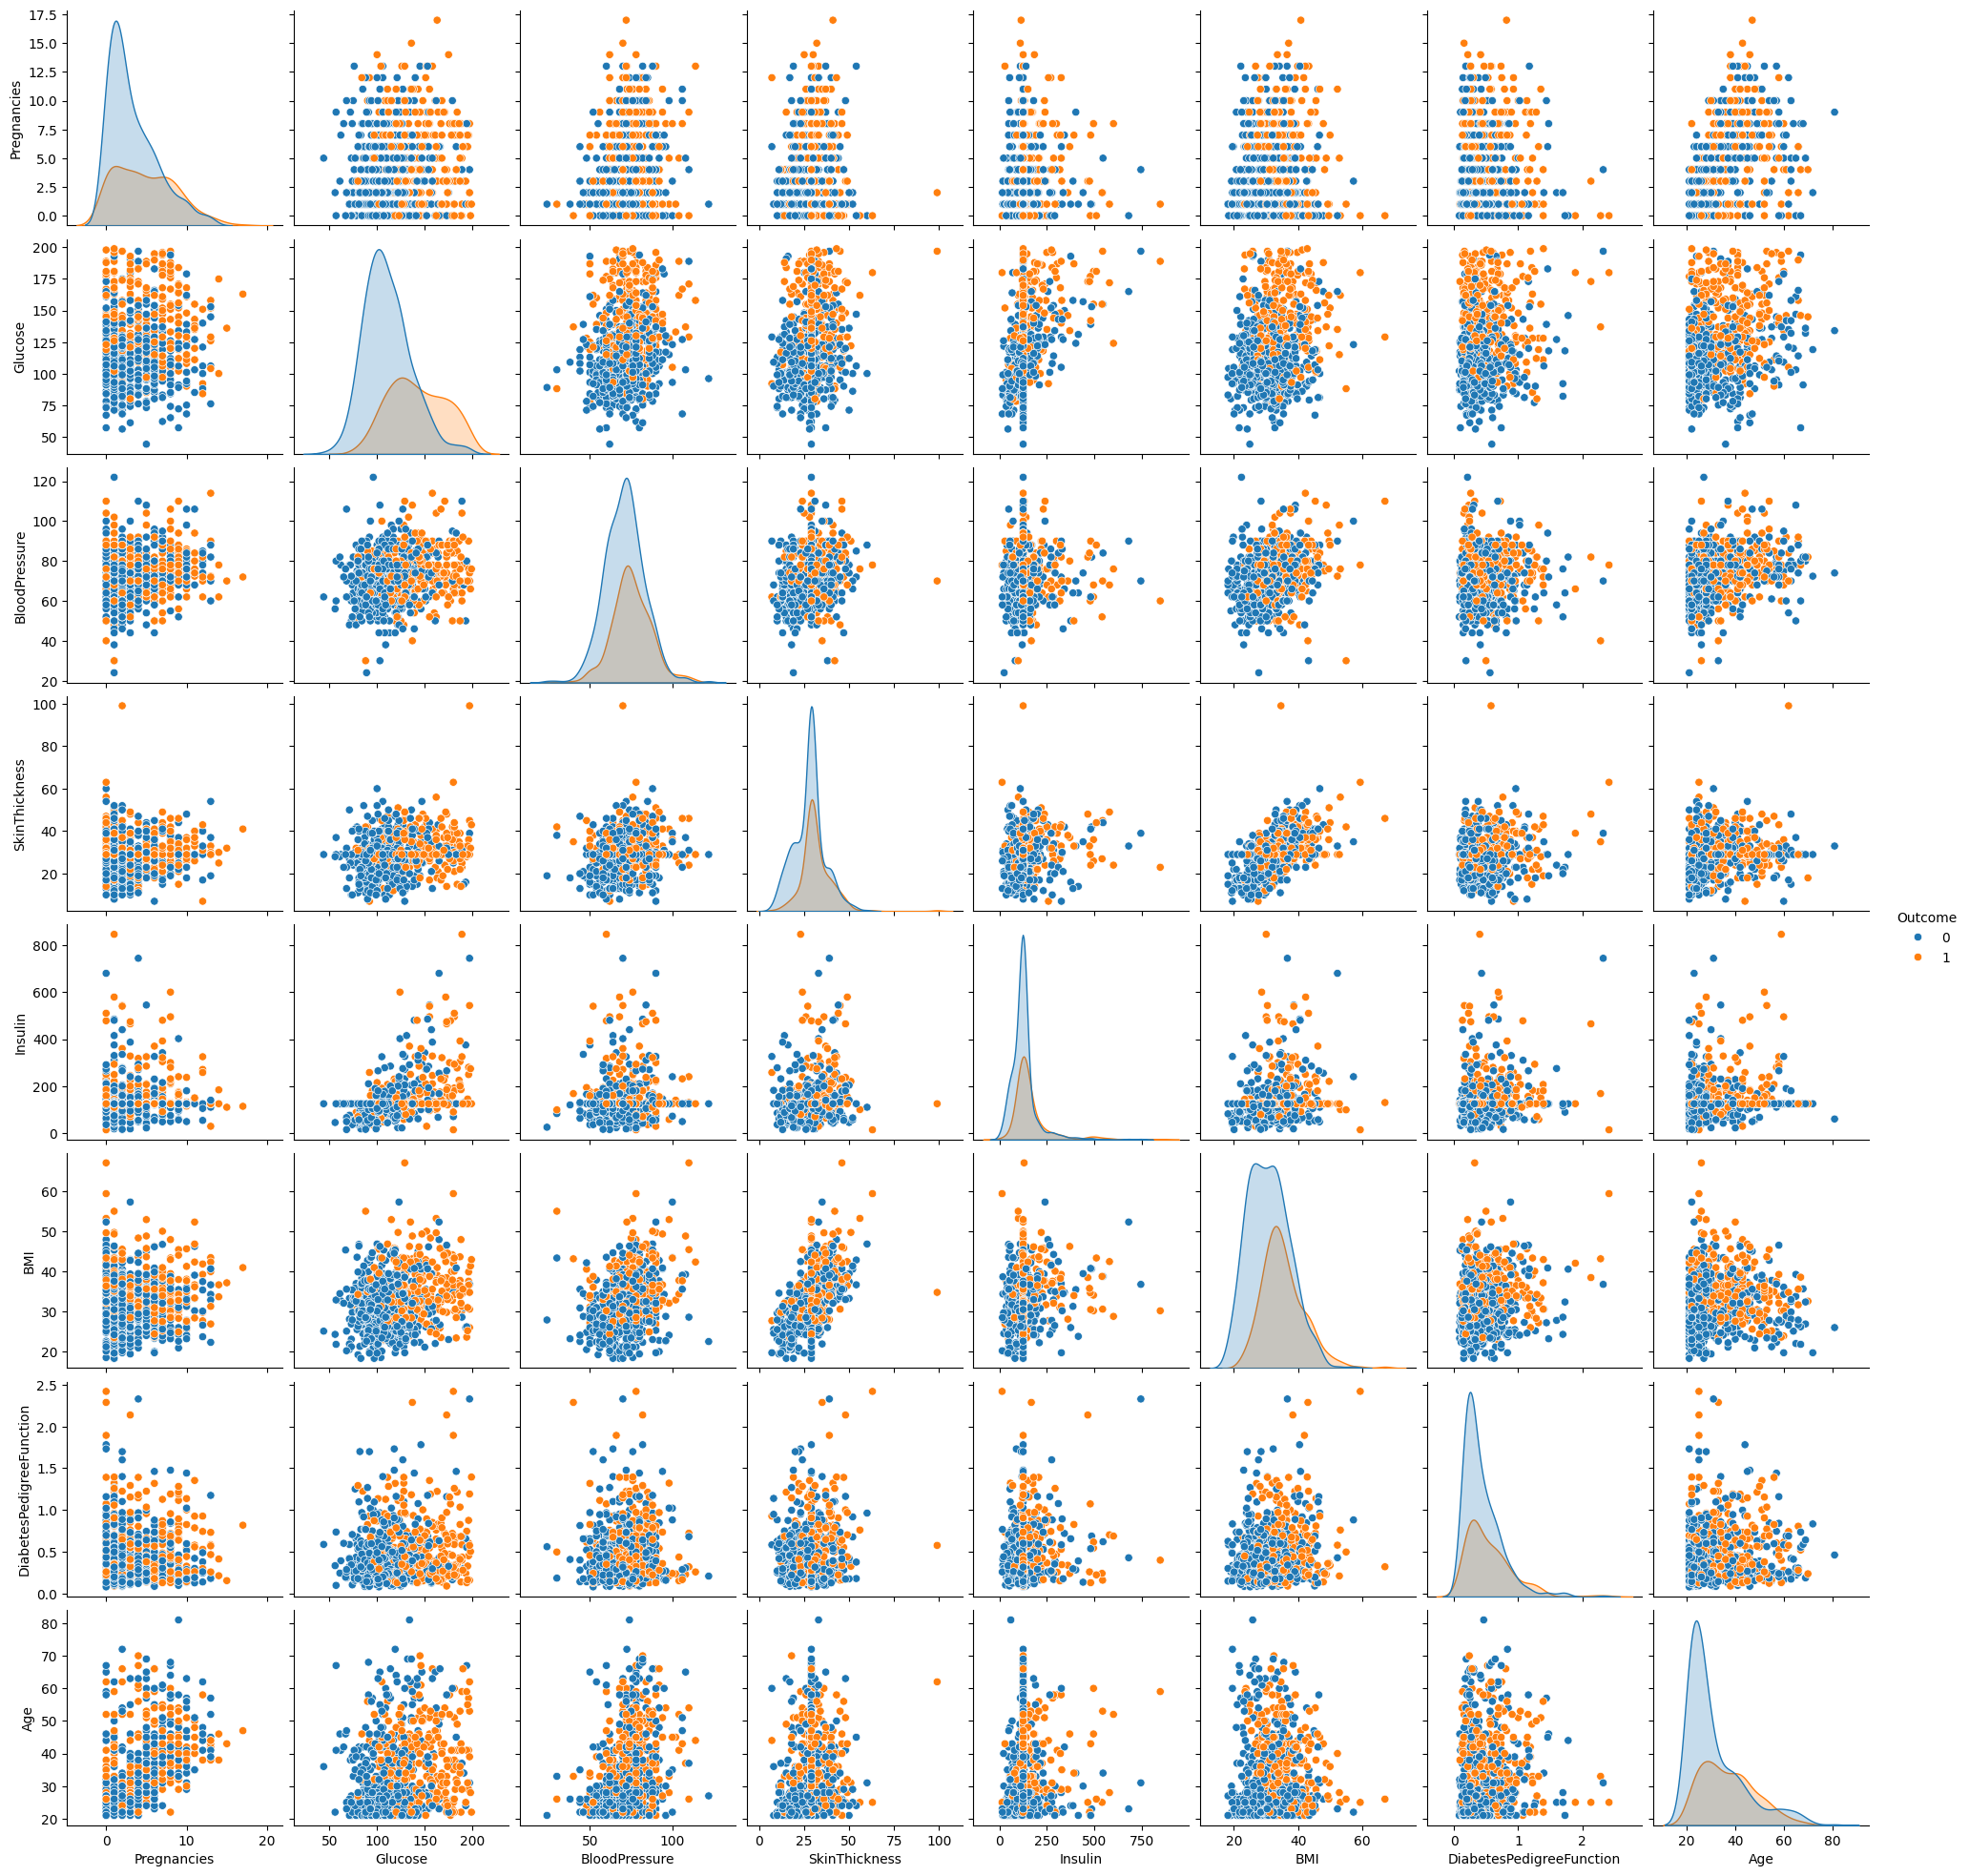

In [35]:
#Pair Plot to see Distribution of all data at a time and dependencies
sns.pairplot(data=data, hue='Outcome')
plt.show()

<Axes: >

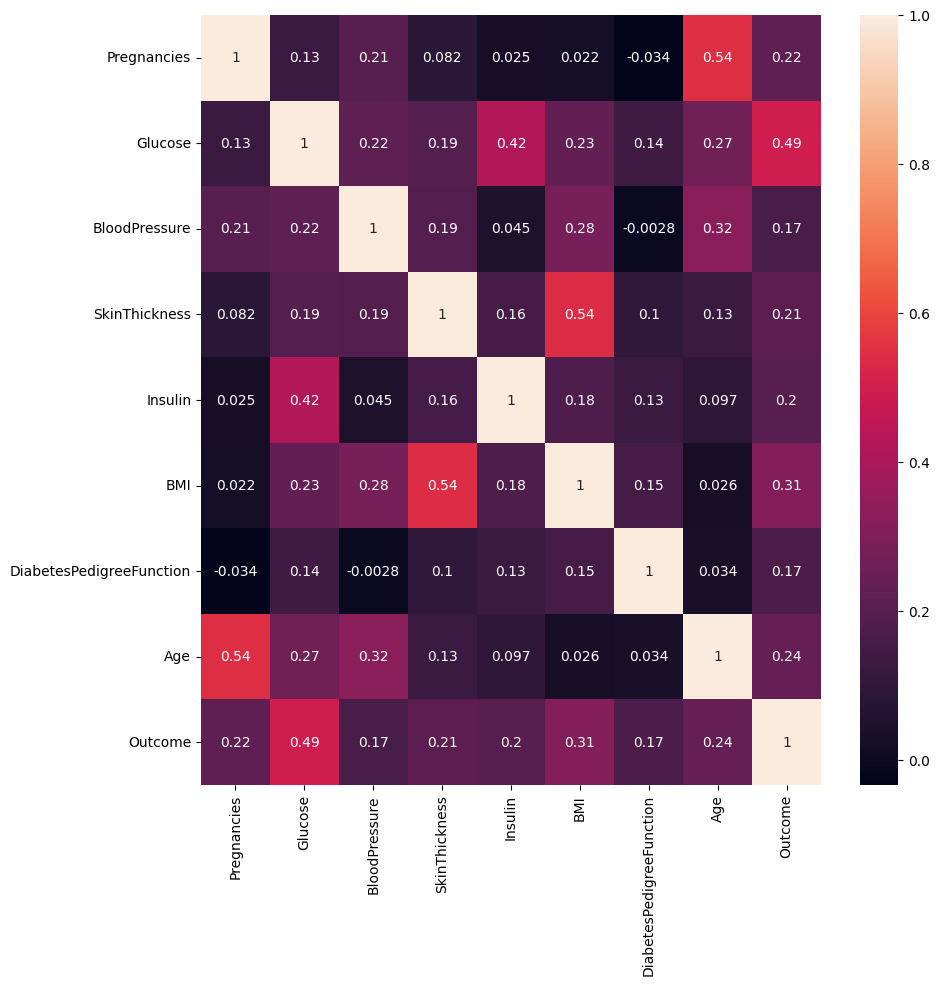

In [38]:
## Heatmap - Relation of different attribute with each other
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(),annot=True,)

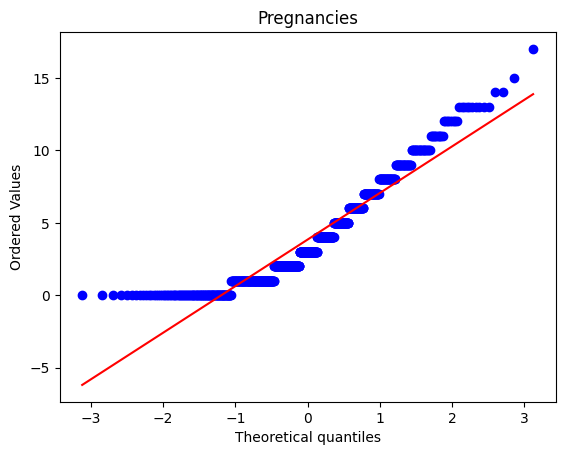

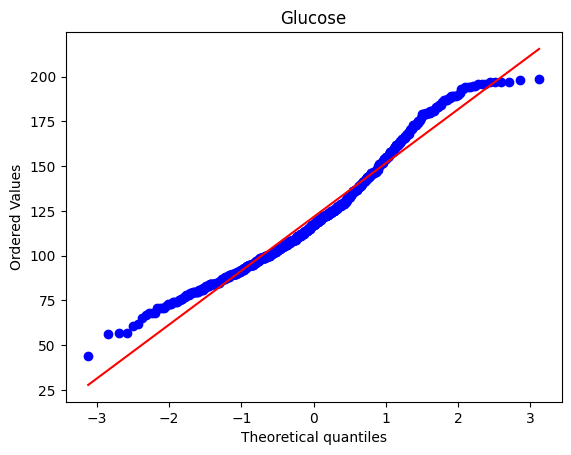

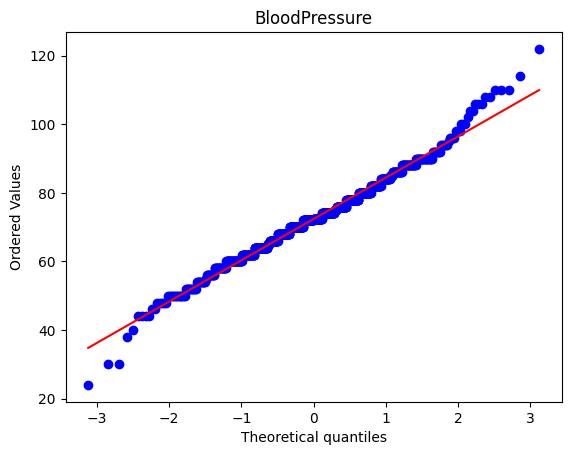

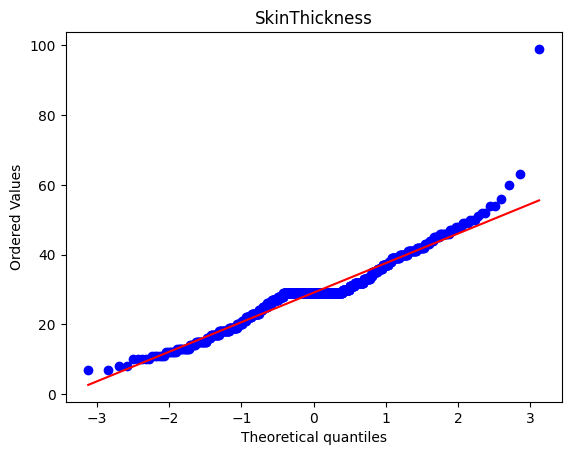

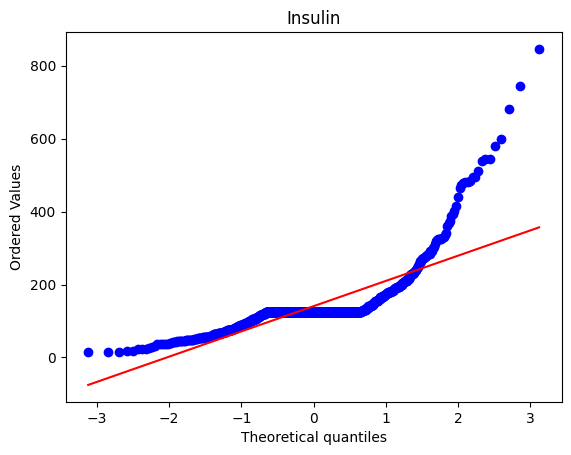

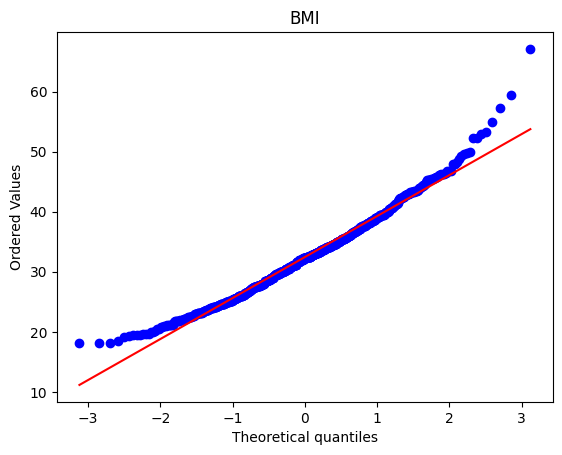

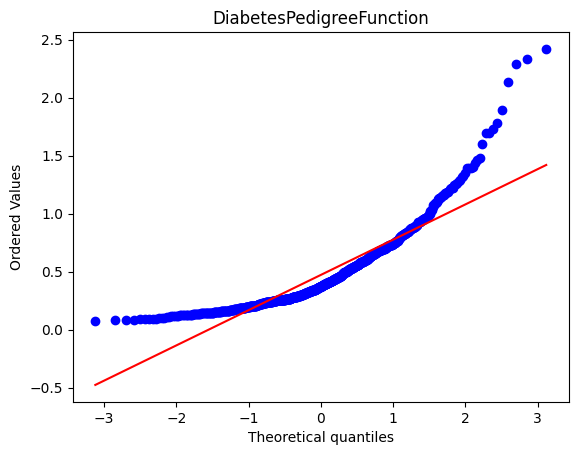

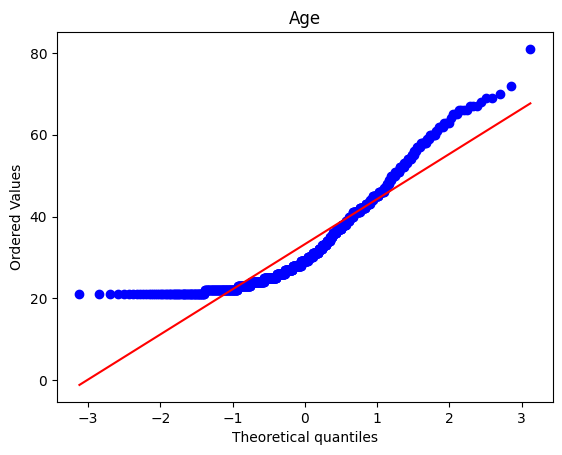

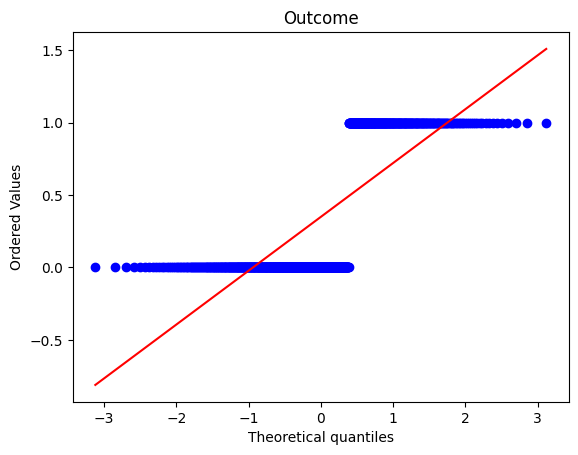

In [42]:
for feature in data.columns:
  stats.probplot(x = data[feature],plot=plt)
  plt.title(feature)
  plt.show()

In [43]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [49]:
X = data.drop(['Outcome'],axis=1)
y = data.iloc[:, -1]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Fitting the data into various models

In [63]:
def svm_classifier(X_train, X_test, y_train, y_test):
  classifier_svm = SVC(kernel = 'rbf', random_state=0)
  classifier_svm.fit(X_train, y_train)

  y_pred = classifier_svm.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)

  return print(f"Train score : {classifier_svm.score(X_train, y_train)} \nTest Score : {classifier_svm.score(X_test, y_test)}")

In [64]:
def naive_classifier(X_train, X_test, y_train, y_test):
  classifier_naive  = GaussianNB()
  classifier_naive .fit(X_train, y_train)

  y_pred = classifier_naive .predict(X_test)
  cm = confusion_matrix(y_test, y_pred)

  return print(f"Train score : {classifier_naive .score(X_train, y_train)} \nTest Score : {classifier_naive .score(X_test, y_test)}")

In [65]:
def knn_classifier(X_train, X_test, y_train, y_test):

    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")


In [66]:
def tree_classifier(X_train, X_test, y_train, y_test):

    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")

In [67]:
def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")


In [68]:
def print_score(X_train, X_test, y_train, y_test):
  print("SVM :\n")
  svm_classifier(X_train, X_test, y_train, y_test)

  print("-"*100)
  print()

  print("Naive: \n")
  naive_classifier(X_train, X_test, y_train, y_test)

  print("-"*100)
  print()

  print("KNN: \n")
  knn_classifier(X_train, X_test, y_train, y_test)

  print("-"*100)
  print()

  print("Decision Tree: \n")
  tree_classifier(X_train, X_test, y_train, y_test)

  print("-"*100)
  print()

  print("Random Forest: \n")
  forest_classifier(X_train, X_test, y_train, y_test)

In [69]:
print_score(X_train, X_test, y_train, y_test)

SVM :

Train score : 0.758957654723127 
Test Score : 0.7922077922077922
----------------------------------------------------------------------------------------------------

Naive: 

Train score : 0.745928338762215 
Test Score : 0.7857142857142857
----------------------------------------------------------------------------------------------------

KNN: 

Train score : 0.8013029315960912
Test score : 0.7662337662337663
----------------------------------------------------------------------------------------------------

Decision Tree: 

Train score : 1.0
Test score : 0.6883116883116883
----------------------------------------------------------------------------------------------------

Random Forest: 

Train score : 1.0
Test score : 0.8116883116883117


In [80]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[94, 13],
       [16, 31]])

Performance matrix

In [81]:
# Predict on the training data
train_pred = classifier_forest.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Predict on the test data
test_pred = classifier_forest.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 1.0
Testing Accuracy: 0.8116883116883117


In [82]:
from sklearn.model_selection import cross_val_score

# Evaluate using cross-validation
cv_scores = cross_val_score(classifier_forest, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.74675325 0.74675325 0.76623377 0.81045752 0.75816993]
Average Cross-Validation Score: 0.7656735421441304


In [83]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Prediction'], margins=True)

Prediction,0,1,All
True,,,
0,94,13,107
1,16,31,47
All,110,44,154


In [84]:
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [85]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       107
           1       0.70      0.66      0.68        47

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154



In [86]:
y_pred_prob = classifier_forest.predict_proba(X_test)[:,1]
y_pred_prob

array([0.83, 0.24, 0.08, 0.59, 0.06, 0.01, 0.89, 0.89, 0.37, 0.42, 0.64,
       0.84, 0.11, 0.16, 0.32, 0.48, 0.82, 0.02, 0.45, 0.15, 0.55, 0.17,
       0.11, 0.18, 0.04, 0.31, 0.05, 0.85, 0.02, 0.11, 0.4 , 0.2 , 0.21,
       0.62, 0.04, 0.75, 0.5 , 0.03, 0.22, 0.65, 0.26, 0.14, 0.14, 0.8 ,
       0.68, 0.1 , 0.04, 0.11, 0.44, 0.19, 0.51, 0.11, 0.81, 0.58, 0.23,
       0.03, 0.17, 0.35, 0.41, 0.55, 0.68, 0.72, 0.1 , 0.62, 0.95, 0.47,
       0.75, 0.14, 0.66, 0.29, 0.09, 0.21, 0.11, 0.82, 0.89, 0.43, 0.2 ,
       0.61, 0.27, 0.32, 0.26, 0.48, 0.23, 0.01, 0.2 , 0.2 , 0.07, 0.3 ,
       0.91, 0.12, 0.31, 0.24, 0.14, 0.01, 0.62, 0.07, 0.33, 0.3 , 0.43,
       0.59, 0.29, 0.  , 0.11, 0.03, 0.66, 0.79, 0.17, 0.66, 0.06, 0.42,
       0.05, 0.55, 0.55, 0.64, 0.62, 0.7 , 0.09, 0.39, 0.07, 0.86, 0.44,
       0.39, 0.16, 0.27, 0.05, 0.03, 0.25, 0.47, 0.36, 0.46, 0.42, 0.39,
       0.02, 0.72, 0.19, 0.6 , 0.25, 0.57, 0.47, 0.2 , 0.05, 0.88, 0.  ,
       0.14, 0.75, 0.  , 0.04, 0.1 , 0.08, 0.26, 0.

In [87]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
print("FPR:\n\n", fpr)

FPR:

 [0.         0.         0.         0.         0.00934579 0.00934579
 0.01869159 0.01869159 0.02803738 0.02803738 0.02803738 0.03738318
 0.03738318 0.03738318 0.06542056 0.07476636 0.07476636 0.09345794
 0.10280374 0.10280374 0.10280374 0.11214953 0.11214953 0.11214953
 0.12149533 0.12149533 0.14018692 0.14018692 0.1588785  0.17757009
 0.19626168 0.19626168 0.20560748 0.23364486 0.25233645 0.25233645
 0.25233645 0.34579439 0.36448598 0.42056075 0.42990654 0.44859813
 0.4953271  0.5046729  0.52336449 0.54205607 0.56074766 0.57009346
 0.61682243 0.62616822 0.68224299 0.71028037 0.74766355 0.76635514
 0.79439252 0.86915888 0.91588785 1.        ]


In [88]:
print("-"*100)

print("TPR:\n\n", tpr)

----------------------------------------------------------------------------------------------------
TPR:

 [0.         0.0212766  0.04255319 0.10638298 0.10638298 0.12765957
 0.12765957 0.17021277 0.19148936 0.25531915 0.31914894 0.34042553
 0.36170213 0.40425532 0.40425532 0.40425532 0.44680851 0.4893617
 0.4893617  0.5106383  0.55319149 0.55319149 0.57446809 0.65957447
 0.65957447 0.68085106 0.68085106 0.74468085 0.74468085 0.78723404
 0.80851064 0.82978723 0.82978723 0.82978723 0.82978723 0.87234043
 0.89361702 0.89361702 0.91489362 0.91489362 0.91489362 0.91489362
 0.91489362 0.93617021 0.93617021 0.95744681 0.95744681 0.95744681
 0.95744681 0.95744681 0.9787234  0.9787234  0.9787234  1.
 1.         1.         1.         1.        ]


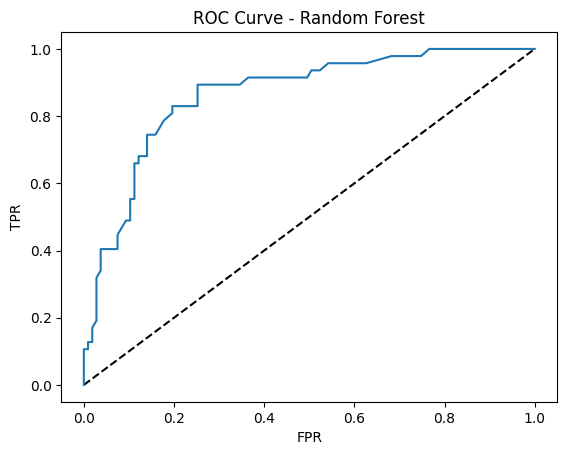

In [89]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - Random Forest")
plt.show()

In [90]:
roc_auc_score(y_test,y_pred_prob)

0.8640882879300059

Hyperparameter tuning

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
parameters = {
    'n_estimators':[25,50,200,300],
    'criterion':['gini','entropy'],
    'max_depth': [14,20,25,30]
}

In [93]:
grid_search = GridSearchCV(estimator=classifier_forest,
              param_grid=parameters,
              scoring='accuracy',
              n_jobs= -1)
grid_search = grid_search.fit(X_train, y_train)
print("best accuracy = ", grid_search.best_score_)
print("best parameters = ",grid_search.best_params_)

best accuracy =  0.7622550979608157
best parameters =  {'criterion': 'entropy', 'max_depth': 14, 'n_estimators': 25}


In [94]:
classifier_forest = RandomForestClassifier(criterion='entropy', max_depth=14,n_estimators= 25)
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[91, 16],
       [17, 30]])

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       107
           1       0.65      0.64      0.65        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.78      0.79      0.79       154

